In [35]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

In [21]:
url = 'https://raw.githubusercontent.com/shruti101/Segmented-Marketing-using-KNN-clustering/main/cluster_data'

In [22]:
df = pd.read_csv(url, sep=',',index_col='customer_number')

In [23]:
df = df.drop('Unnamed: 0', axis=1)
df

,Cluster,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,bakery,newspapers_magazines,prepared_meals,soft_drinks,...,world_foods,lottery,cashpoint,seasonal_gifting,discount_bakery,practical_items,total_quantity,average_quantity,total_spend,average_spend
customer_number,,,,,,,,,,,,,,,,,,,,,
11387,5,64.58,35.91,107.78,27.08,29.59,1.0,54.83,6.35,22.83,...,28.54,2.0,15.0,7.48,1.0,0.84,545,1.109980,697.76,1.42
8171,1,16.89,37.24,28.84,33.43,66.40,1.0,22.06,12.09,2.34,...,3.76,1.0,1.0,9.99,1.0,1.00,330,1.235955,369.31,1.38
1060,0,87.30,82.98,49.88,20.57,37.04,18.0,9.85,57.98,31.12,...,1.00,18.0,20.0,106.46,1.0,1.00,432,1.125000,668.68,1.74
3728,2,84.05,186.56,175.50,119.84,111.08,1.0,13.05,25.54,124.42,...,1.00,4.0,1.0,1.00,1.0,4.50,1010,1.393103,1104.10,1.52
14621,1,35.16,121.31,79.23,29.03,37.17,1.0,40.06,1.00,4.68,...,1.00,1.0,1.0,3.40,1.0,1.00,760,1.124260,524.45,0.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12541,1,64.52,73.84,89.36,135.31,61.99,1.0,1.00,61.02,56.62,...,3.36,1.0,1.0,1.00,1.0,2.53,851,1.113874,800.43,1.05
16081,4,5.91,18.08,18.32,23.69,16.12,1.0,5.39,15.96,0.67,...,9.74,30.0,1.0,1.00,1.0,1.61,209,1.082902,222.26,1.15
7094,1,116.54,106.08,42.31,35.92,43.59,1.0,13.68,1.78,21.44,...,2.59,1.0,1.0,1.00,1.0,6.79,354,1.085890,448.42,1.38


In [24]:
x = df.drop(['Cluster'] , axis =1)
y = df.Cluster

In [25]:
x
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['Cluster','average_spend'],axis=1), df['average_spend'], test_size= 0.3)

In [30]:
for num in range(5,20):
    dtr = DecisionTreeRegressor(max_features= 'log2',
     max_leaf_nodes= num,
     min_samples_leaf= 10,
     min_samples_split= 5,
     splitter='best'
       )
    dtr.fit(x_train,y_train)
    pred = dtr.predict(x_test)
    print('For max_leaf_nodes = %s' % num)
    print('Mean Squared Error',mean_squared_error(pred,y_test))
    print('Mean Absolute Error',mean_absolute_error(pred,y_test))
    print('Root Mean Squared Error',mean_squared_error(pred,y_test)**0.5)
    print('Clusters = ',np.unique(pred))
    print()

For max_leaf_nodes = 5
Mean Squared Error 0.3259370421498664
Mean Absolute Error 0.37428043793868304
Root Mean Squared Error 0.5709089613501144
Clusters =  [1.45279786 1.96473451 2.1271161  2.95303922 3.98      ]

For max_leaf_nodes = 6
Mean Squared Error 0.34457400279619294
Mean Absolute Error 0.38177488671250004
Root Mean Squared Error 0.5870042613100802
Clusters =  [1.40727341 1.9135122  2.01211538 2.12092308 2.20833333 3.09788732]

For max_leaf_nodes = 7
Mean Squared Error 0.3752135424782484
Mean Absolute Error 0.4068743693240854
Root Mean Squared Error 0.6125467675845236
Clusters =  [1.43384615 1.59111111 1.87565836 2.21517241 2.44042373 3.08814815
 4.12771429]

For max_leaf_nodes = 8
Mean Squared Error 0.37726485116322706
Mean Absolute Error 0.4167646285946877
Root Mean Squared Error 0.6142188951532076
Clusters =  [1.54433648 1.55136508 1.62221739 2.51416667 2.89133333 3.01038462
 3.43347826 3.81567568]

For max_leaf_nodes = 9
Mean Squared Error 0.44987990054254257
Mean Absolute 

In [31]:
num = 11
dtr = DecisionTreeRegressor(max_features= 'log2',
     max_leaf_nodes= num,
     min_samples_leaf= 10,
     min_samples_split= 5,
     splitter='best')
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_features='log2', max_leaf_nodes=11,
                      min_samples_leaf=10, min_samples_split=5)

In [32]:
feats = x_train.columns

In [33]:
text_representation = tree.export_text(dtr)
print(text_representation)

|--- feature_20 <= 231.50
|   |--- feature_10 <= 3.00
|   |   |--- feature_7 <= 7.01
|   |   |   |--- feature_0 <= 13.10
|   |   |   |   |--- feature_22 <= 156.36
|   |   |   |   |   |--- value: [1.62]
|   |   |   |   |--- feature_22 >  156.36
|   |   |   |   |   |--- value: [4.21]
|   |   |   |--- feature_0 >  13.10
|   |   |   |   |--- value: [2.16]
|   |   |--- feature_7 >  7.01
|   |   |   |--- value: [1.70]
|   |--- feature_10 >  3.00
|   |   |--- feature_1 <= 5.17
|   |   |   |--- value: [2.61]
|   |   |--- feature_1 >  5.17
|   |   |   |--- feature_2 <= 8.14
|   |   |   |   |--- value: [2.23]
|   |   |   |--- feature_2 >  8.14
|   |   |   |   |--- feature_11 <= 122.47
|   |   |   |   |   |--- feature_22 <= 343.91
|   |   |   |   |   |   |--- value: [1.52]
|   |   |   |   |   |--- feature_22 >  343.91
|   |   |   |   |   |   |--- value: [2.44]
|   |   |   |   |--- feature_11 >  122.47
|   |   |   |   |   |--- value: [3.05]
|--- feature_20 >  231.50
|   |--- feature_12 <= 249.89
|

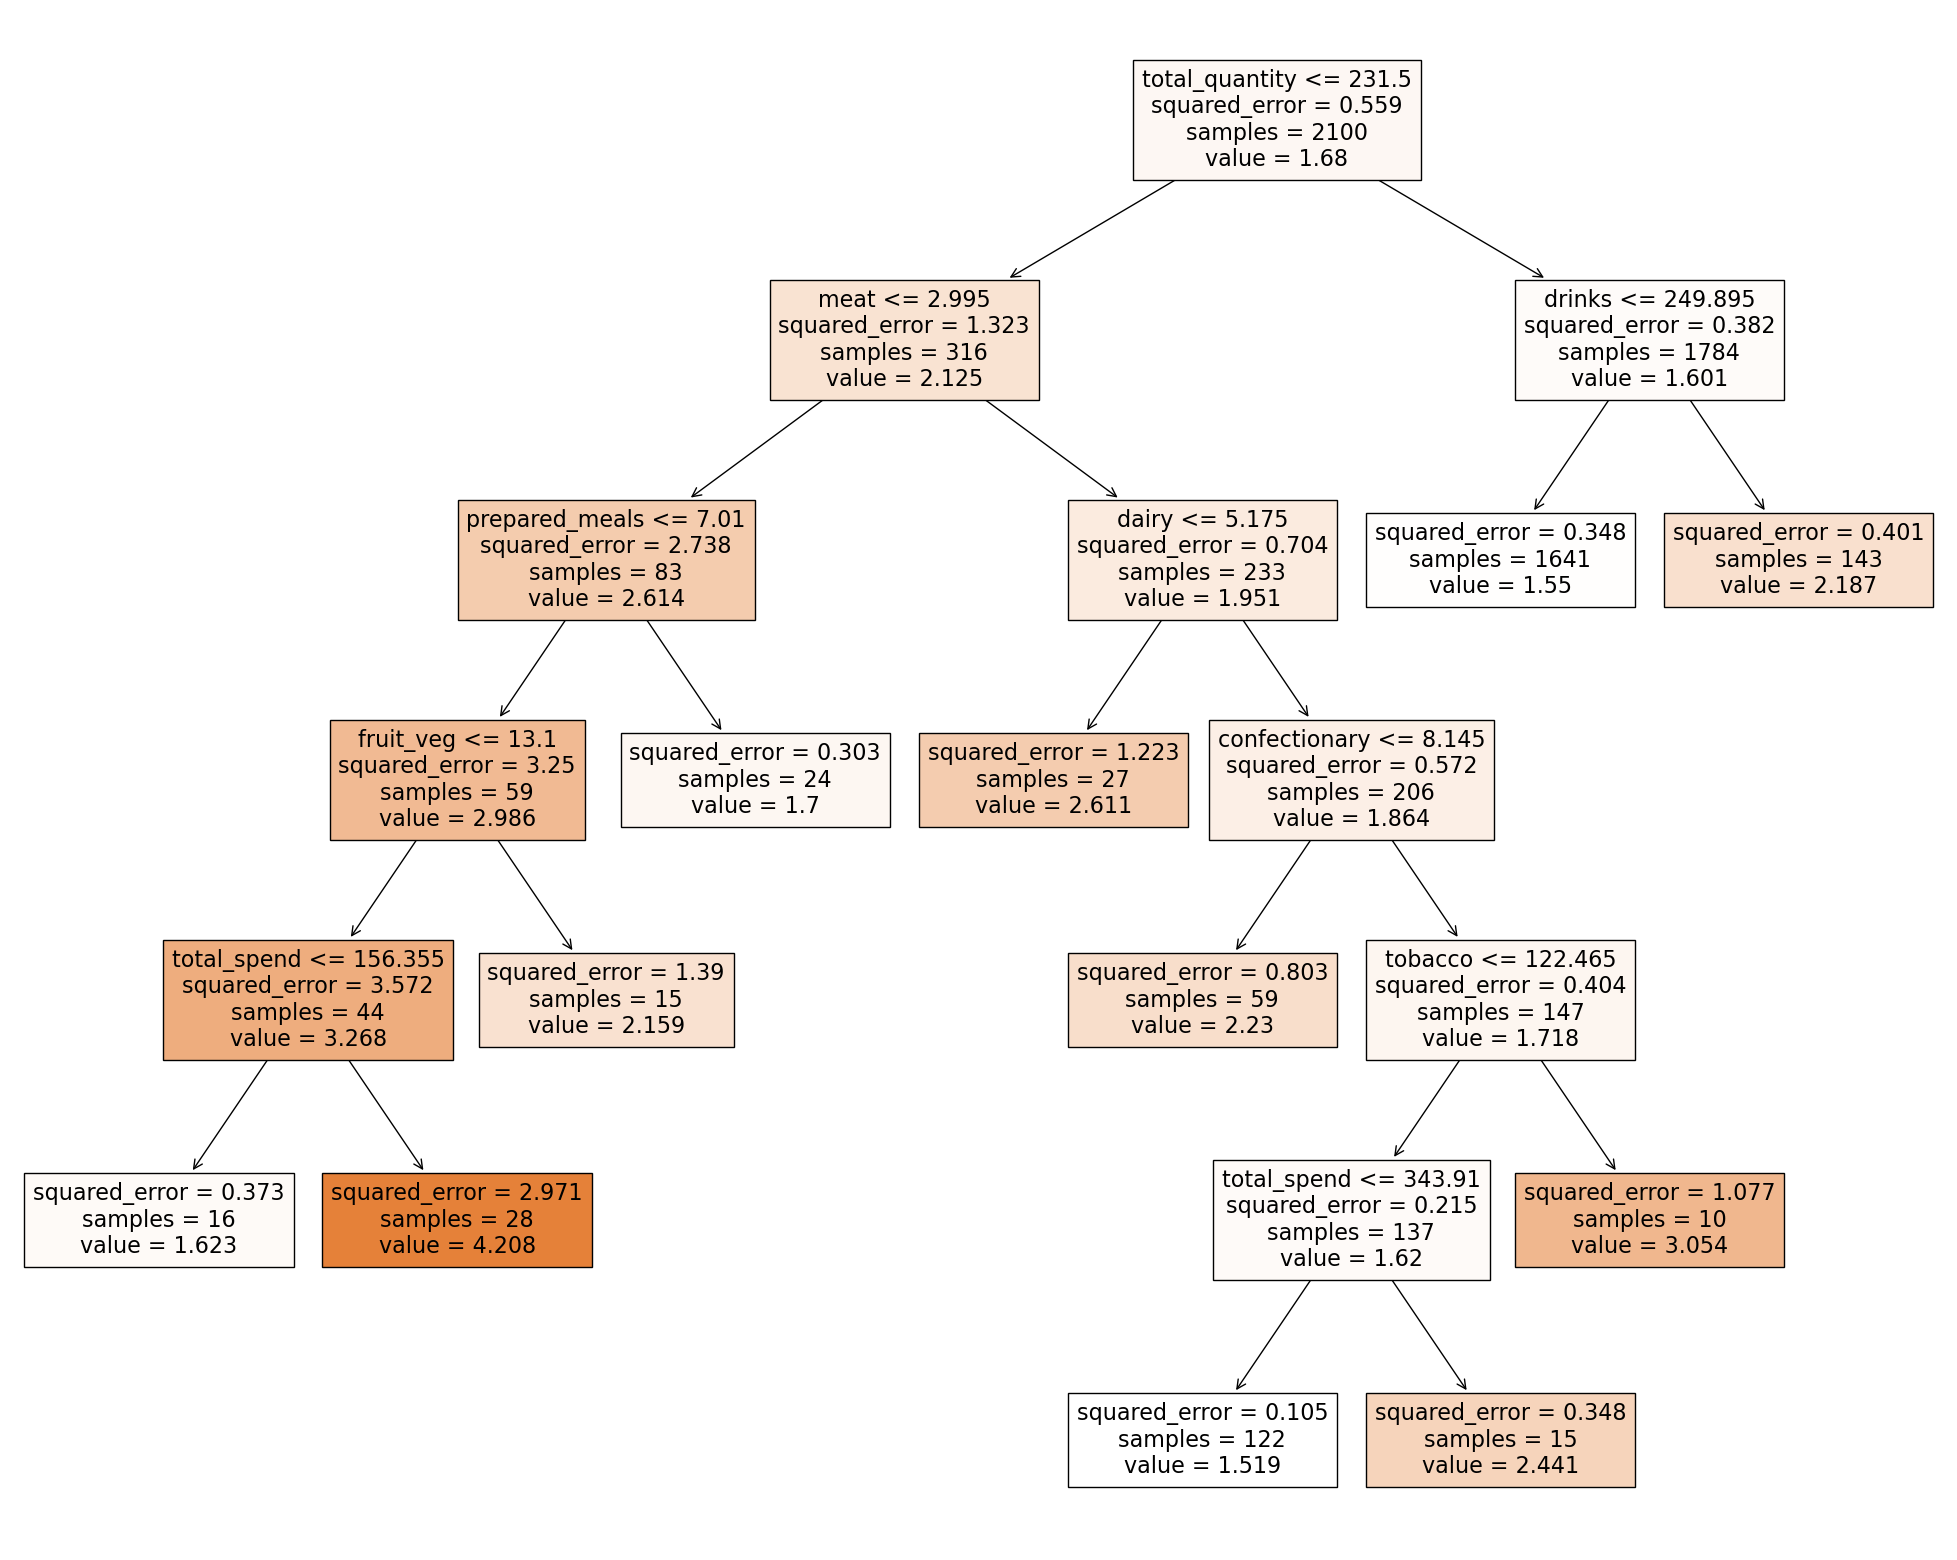

In [36]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtr, 
                   feature_names=feats,  
                   
                   filled=True)

In [40]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    feature_names = [f.replace(" ", "_")[:-5] for f in feature_names]
    print("def predict({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "    " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, np.round(threshold,2)))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, np.round(threshold,2)))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

In [41]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [42]:
rules = get_rules(dtr, feats, y)
for r in rules:
    print(r)


KeyError: 0